In [1]:
%matplotlib inline

In [2]:
import bokeh.plotting as plt
plt.output_notebook()

Loading BokehJS ...

In [3]:
from bokeh.charts import Bar
from bokeh.charts.operations import blend
from bokeh.charts.attributes import cat, color

In [4]:
index = pd.Index([1,2,3,4,5], label='period')
columns = pd.Index(['A', 'B', 'C'], label='categories')
values = randint(10, 100, 15).reshape(5, 3)
values.sort(axis=0)
df = pd.DataFrame(values, index, columns)
original_df = df.copy()
original_df

,A,B,C
1,16,10,17
2,33,24,22
3,40,51,37
4,60,55,82
5,89,78,99


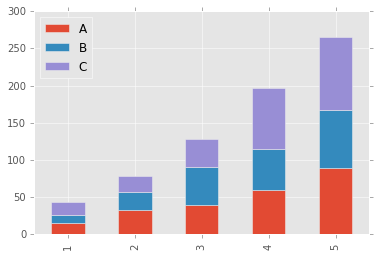

In [5]:
df.plot.bar(stacked=True);

<hr>

In [6]:
tmp = df.unstack().reset_index()
tmp.columns = list(map(str, tmp.columns)) # bokeh requires column labels to be strings
tmp

,level_0,level_1,0
0,A,1,16
1,A,2,33
2,A,3,40
3,A,4,60
4,A,5,89
5,B,1,10
6,B,2,24
7,B,3,51
8,B,4,55
9,B,5,78


In [7]:
fig = Bar(tmp, stack=tmp.columns[0], label=tmp.columns[1], values=tmp.columns[2], legend=True)
plt.show(fig);

In [8]:
def stacked_bar(df, xlabel=None, ylabel=None, title=None):
    df = df.copy()
    if xlabel is not None:
        df.index.name = xlabel
    if ylabel is not None:
        df.columns.name = ylabel
    df = df.unstack().reset_index()
    df.columns = list(map(str, df.columns[:-1])) + ['value']
    fig = Bar(df, stack=df.columns[0], label=df.columns[1], values=df.columns[2], legend=True)
    if title is not None:
        fig.title = title
    return fig

In [9]:
fig = stacked_bar(df, 'idx', 'category', 'Stacked Bar Example')
plt.show(fig);